In [1]:
import torch
if(torch.cuda.is_available()):
    device = torch.device("cuda")
    print(device, torch.cuda.get_device_name(0))
else:
    device= torch.device("cpu")
    print(device)

cuda Tesla T4


In [2]:
import torch.nn as nn

In [3]:
class Flatten(nn.Module):
  def forward(self, input):
    return input.view(input.size(0), -1)

In [4]:
class UnFlatten(nn.Module):
  def forward(self, input, size=1024):
    return input.view(input.size(0), size, 1, 1)

In [5]:
class autoencoder(nn.Module):
  def __init__(self,i=1024,o=64):
    super(autoencoder, self).__init__()
    self.encoder = nn.Sequential(
      nn.Conv2d(3, 32, kernel_size=2, stride=2),
      nn.BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
      nn.ReLU(),
      nn.Conv2d(32, 64, kernel_size=2, stride=2),
      nn.BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
      nn.ReLU(),
      nn.Conv2d(64, 128, kernel_size=2, stride=2),
      nn.BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
      nn.ReLU(),
      nn.Conv2d(128, 256, kernel_size=2, stride=2),
      nn.BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
      nn.ReLU(),
      nn.Conv2d(256, 512, kernel_size=2, stride=2),
      nn.BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
      nn.ReLU(),
      nn.Conv2d(512, 1024, kernel_size=2, stride=2),
      nn.BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
      nn.ReLU(),
      nn.Conv2d(1024, 1024, kernel_size=2, stride=2),
      nn.BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
      nn.ReLU(),
      Flatten(),
      nn.Linear(in_features=i, out_features=o),
    )
    self.decoder = nn.Sequential(
      nn.Linear(in_features=o, out_features=i),
      UnFlatten(),
      nn.ConvTranspose2d(1024, 1024, kernel_size=2, stride=2),
      nn.BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
      nn.ReLU(),
      nn.ConvTranspose2d(1024, 512, kernel_size=2, stride=2),
      nn.BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
      nn.ReLU(),
      nn.ConvTranspose2d(512, 256, kernel_size=2, stride=2),
      nn.BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
      nn.ReLU(),
      nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2),
      nn.BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
      nn.ReLU(),
      nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2),
      nn.BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
      nn.ReLU(),
      nn.ConvTranspose2d(64, 32, kernel_size=2, stride=2),
      nn.BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
      nn.ReLU(),
      nn.ConvTranspose2d(32, 3, kernel_size=2, stride=2),
      nn.BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
      nn.Sigmoid(),
    )

  def forward(self, x):
      x = self.encoder(x)
      x = self.decoder(x)
      return x

In [6]:
model=autoencoder()
model.to(device)
print(model)

autoencoder(
  (encoder): Sequential(
    (0): Conv2d(3, 32, kernel_size=(2, 2), stride=(2, 2))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(32, 64, kernel_size=(2, 2), stride=(2, 2))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Conv2d(64, 128, kernel_size=(2, 2), stride=(2, 2))
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
    (9): Conv2d(128, 256, kernel_size=(2, 2), stride=(2, 2))
    (10): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU()
    (12): Conv2d(256, 512, kernel_size=(2, 2), stride=(2, 2))
    (13): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): ReLU()
    (15): Conv2d(512, 1024, kernel_size=(2, 2), stride=(2, 2))
    (16): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, t

In [7]:
from torchsummary import summary
summary(model,(3,128,128))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 64, 64]             416
       BatchNorm2d-2           [-1, 32, 64, 64]              64
              ReLU-3           [-1, 32, 64, 64]               0
            Conv2d-4           [-1, 64, 32, 32]           8,256
       BatchNorm2d-5           [-1, 64, 32, 32]             128
              ReLU-6           [-1, 64, 32, 32]               0
            Conv2d-7          [-1, 128, 16, 16]          32,896
       BatchNorm2d-8          [-1, 128, 16, 16]             256
              ReLU-9          [-1, 128, 16, 16]               0
           Conv2d-10            [-1, 256, 8, 8]         131,328
      BatchNorm2d-11            [-1, 256, 8, 8]             512
             ReLU-12            [-1, 256, 8, 8]               0
           Conv2d-13            [-1, 512, 4, 4]         524,800
      BatchNorm2d-14            [-1, 51

In [8]:
loss_func = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

#Connect to Google drive

In [9]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [10]:
from torchvision import transforms
transformer = transforms.Compose([
  transforms.Resize((128, 128)),       
  transforms.ToTensor(),                     
  transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5] )])

In [11]:
from torchvision import datasets
train_dataset = datasets.ImageFolder(root = "/content/gdrive/MyDrive/Image folders/train", transform = transformer)

In [12]:
import torch.utils.data as Data
loader = Data.DataLoader(
    dataset=train_dataset,
    batch_size=16,
    shuffle=True)

#Try to send one batch of training images to AE

In [13]:
for batchX, _ in loader:
  break;
print(batchX.shape)

torch.Size([16, 3, 128, 128])


In [14]:
tensorY=model(batchX.to(device))
print(tensorY.shape)

torch.Size([16, 3, 128, 128])


In [15]:
loss = loss_func(tensorY, batchX.to(device))
print(loss)

tensor(0.7689, device='cuda:0', grad_fn=<MseLossBackward>)


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import torchvision

In [17]:
def ConvertTensorToArray (tensorInput):
  imgTensor = torchvision.utils.make_grid(tensorInput)
  imgArray = imgTensor.numpy() 
  imgArray1 = np.zeros((imgArray.shape[1], imgArray.shape[2], 3))
  imgArray1[:,:,0] = imgArray[0, :, :]  
  imgArray1[:,:,1] = imgArray[1, :, :]
  imgArray1[:,:,2] = imgArray[2, :, :]
  imgArray1 = imgArray1*0.5+0.5
  return imgArray1

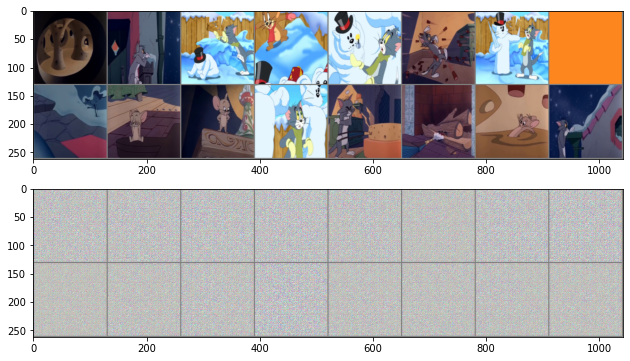

In [18]:
#compare Input vs Output
fig,axs=plt.subplots(2,1,figsize=(12,6))
imgArray=ConvertTensorToArray(batchX) 
axs[0].imshow(imgArray)
imgArray=ConvertTensorToArray(tensorY.cpu()) 
axs[1].imshow(imgArray)
plt.show()

#Training loop

In [20]:
lossLst = []
for epoch in range(800):
  if(epoch%20==0):
    print("\nepoch = ", epoch, end = ", ")
    print("batch: ", end="")
  for step, (batchX, _) in enumerate(loader):
    if(epoch%5==0 and step%5==0):
      print(step, end = ",")
    tensorY = model(batchX.to(device))
    loss = loss_func(tensorY, batchX.to(device))
    lossLst.append(float(loss))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


epoch =  0, batch: 0,5,10,15,0,5,10,15,0,5,10,15,0,5,10,15,
epoch =  20, batch: 0,5,10,15,0,5,10,15,0,5,10,15,0,5,10,15,
epoch =  40, batch: 0,5,10,15,0,5,10,15,0,5,10,15,0,5,10,15,
epoch =  60, batch: 0,5,10,15,0,5,10,15,0,5,10,15,0,5,10,15,
epoch =  80, batch: 0,5,10,15,0,5,10,15,0,5,10,15,0,5,10,15,
epoch =  100, batch: 0,5,10,15,0,5,10,15,0,5,10,15,0,5,10,15,
epoch =  120, batch: 0,5,10,15,0,5,10,15,0,5,10,15,0,5,10,15,
epoch =  140, batch: 0,5,10,15,0,5,10,15,0,5,10,15,0,5,10,15,
epoch =  160, batch: 0,5,10,15,0,5,10,15,0,5,10,15,0,5,10,15,
epoch =  180, batch: 0,5,10,15,0,5,10,15,0,5,10,15,0,5,10,15,
epoch =  200, batch: 0,5,10,15,0,5,10,15,0,5,10,15,0,5,10,15,
epoch =  220, batch: 0,5,10,15,0,5,10,15,0,5,10,15,0,5,10,15,
epoch =  240, batch: 0,5,10,15,0,5,10,15,0,5,10,15,0,5,10,15,
epoch =  260, batch: 0,5,10,15,0,5,10,15,0,5,10,15,0,5,10,15,
epoch =  280, batch: 0,5,10,15,0,5,10,15,0,5,10,15,0,5,10,15,
epoch =  300, batch: 0,5,10,15,0,5,10,15,0,5,10,15,0,5,10,15,
epoch =  320,

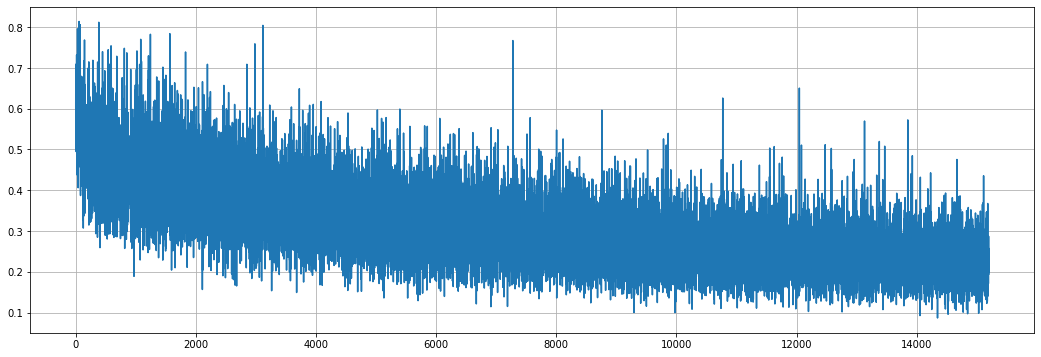

In [21]:
fig=plt.figure(figsize=(18, 6))
plt.plot(lossLst)
plt.grid()

#Test with training images

In [22]:
model.eval()
print("")

In [23]:
for batchX, _ in loader:
  break;
print(batchX.shape)

torch.Size([16, 3, 128, 128])


In [24]:
tensorY=model(batchX.to(device))
print(tensorY.shape)

torch.Size([16, 3, 128, 128])


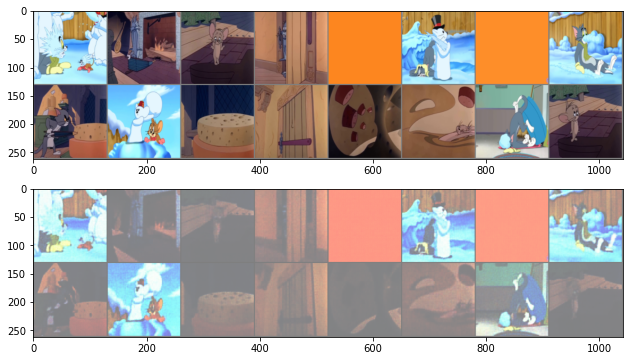

In [25]:
fig,axs=plt.subplots(2,1,figsize=(12,6))
imgArray=ConvertTensorToArray(batchX) 
axs[0].imshow(imgArray)
imgArray=ConvertTensorToArray(tensorY.cpu()) 
axs[1].imshow(imgArray)
plt.show()

#Test with un-seen test data

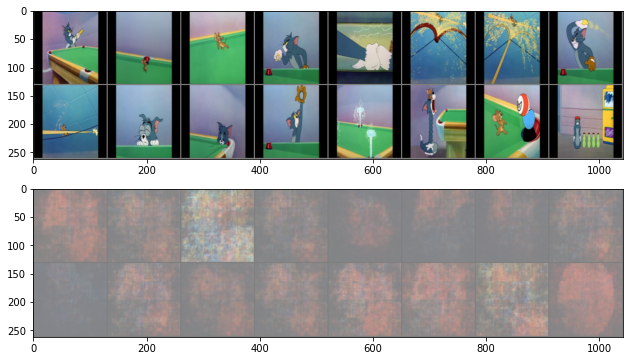

In [26]:
test_dataset = datasets.ImageFolder(root = "/content/gdrive/MyDrive/Image folders/test", transform = transformer)
loader = Data.DataLoader(
    dataset=test_dataset,
    batch_size=16,
    shuffle=True)
for batchX, _ in loader:
  break;
tensorY=model(batchX.to(device))

fig,axs=plt.subplots(2,1,figsize=(12,6))
imgArray=ConvertTensorToArray(batchX) 
axs[0].imshow(imgArray)
imgArray=ConvertTensorToArray(tensorY.cpu()) 
axs[1].imshow(imgArray)
plt.show()

#Save and load a PyTorch model (if you want)

In [27]:
torch.save(model.state_dict(), "AE800.pt")

In [28]:
model=autoencoder() #build NN architecture
model.load_state_dict(torch.load("AE800.pt")) #load model weights
model.to(device)
model.eval()

autoencoder(
  (encoder): Sequential(
    (0): Conv2d(3, 32, kernel_size=(2, 2), stride=(2, 2))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(32, 64, kernel_size=(2, 2), stride=(2, 2))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Conv2d(64, 128, kernel_size=(2, 2), stride=(2, 2))
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
    (9): Conv2d(128, 256, kernel_size=(2, 2), stride=(2, 2))
    (10): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU()
    (12): Conv2d(256, 512, kernel_size=(2, 2), stride=(2, 2))
    (13): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): ReLU()
    (15): Conv2d(512, 1024, kernel_size=(2, 2), stride=(2, 2))
    (16): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, t

# Try to pass a batch of training images to AE to get their latent vectors

In [29]:
loader=Data.DataLoader(
  dataset=train_dataset,
  batch_size=16,
  shuffle=True)

In [30]:
for batchX, batchY in loader:
  break;
print(batchX.shape)

torch.Size([16, 3, 128, 128])


In [31]:
# batchY in tensor, array, and reshape
arrayY = batchY.cpu().detach().numpy()
arrayY1 = arrayY.reshape(arrayY.shape[0], 1)
print(batchY, "\n", arrayY, "\n", arrayY.shape, "\n", arrayY1, "\n", arrayY1.shape)

tensor([4, 0, 3, 0, 2, 1, 4, 4, 4, 2, 4, 3, 1, 2, 3, 2]) 
 [4 0 3 0 2 1 4 4 4 2 4 3 1 2 3 2] 
 (16,) 
 [[4]
 [0]
 [3]
 [0]
 [2]
 [1]
 [4]
 [4]
 [4]
 [2]
 [4]
 [3]
 [1]
 [2]
 [3]
 [2]] 
 (16, 1)


In [32]:
tensorY=model.encoder(batchX.to(device))
print(tensorY.shape)

torch.Size([16, 64])


In [33]:
tensorY.cpu().detach().numpy().shape

(16, 64)

In [34]:
arrayY = np.array(tensorY.cpu().detach().numpy())
print(arrayY.shape)

(16, 64)


In [35]:
arrayY2 = np.array(tensorY.cpu().detach().numpy())

In [36]:
arrayY3 = np.concatenate((arrayY, arrayY2))
print(arrayY3.shape)

(32, 64)


# Get the latent vectors of all training images

In [37]:
for step, (batchX, batchY) in enumerate(loader):
  tensorY = model.encoder(batchX.to(device))
  if(step==0):
    arrayX = np.array(tensorY.cpu().detach().numpy())
    arrayY = batchY.cpu().detach().numpy()
  else:
    arrayX = np.concatenate((arrayX, tensorY.cpu().detach().numpy()))
    arrayY = np.concatenate((arrayY, batchY.cpu().detach().numpy()))
print(arrayX.shape, arrayY.shape)

(298, 64) (298,)


# t-SNE to reduce dimensions from 64 to 2 so we can visualize

In [38]:
from sklearn.manifold import TSNE
tsne = TSNE(perplexity=5, n_components=2, init='pca', n_iter=5000)
# try perlexity = 5, 10, 30, 50

In [39]:
x=tsne.fit_transform(arrayX)
print(x.shape)

(298, 2)


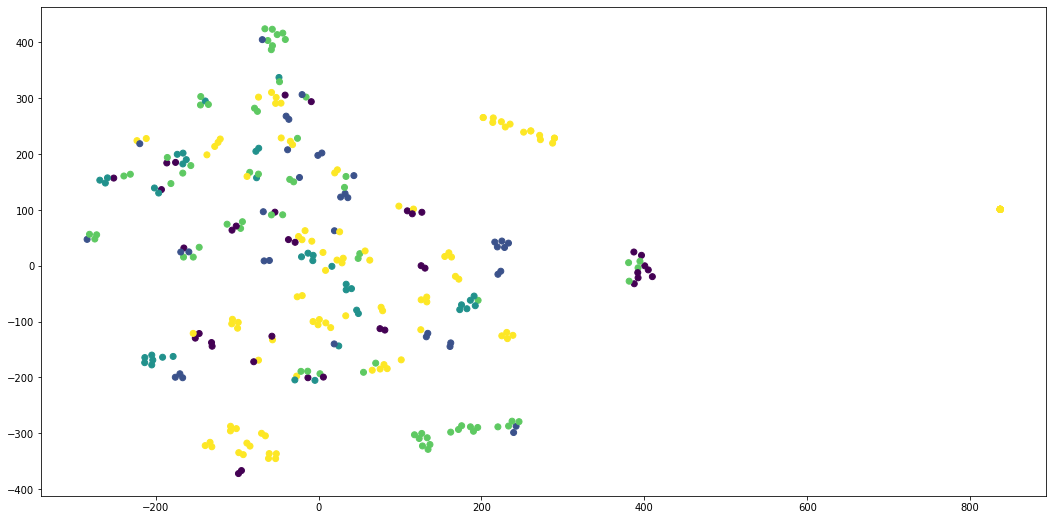

In [40]:
plt.figure(figsize=(18,9))
plt.scatter(x[:, 0], x[:, 1], c= arrayY)
plt.show()

# Save data to csv for Tableau visual exploration

In [41]:
x1 = np.array([[10,20,30], [40,50,60]])
y1 = np.array([[100], [200]])
z1 = np.append(x1, y1, axis=1)
print(x1.shape, y1.shape, z1.shape)

(2, 3) (2, 1) (2, 4)


In [42]:
print(x.shape, arrayY.shape)

(298, 2) (298,)


In [43]:
arrayY1 = arrayY.reshape(arrayY.shape[0], 1)
print(arrayY1.shape)

(298, 1)


In [44]:
XYArray = np.hstack((x, arrayY1))
print(XYArray.shape)

(298, 3)


In [45]:
# Save data to excel for further Tableau visualization
import pandas as pd 
pd.DataFrame(XYArray).to_csv("tSNE.csv")